In [1]:
import matplotlib.pyplot as plt
import pandas, numpy

In [2]:
# WORKS FINE FOR SCENARIO: MAINTAIN CURRENT LUMINOSITY

# NOTE: SET NUMBER OF MODES AS NUM_MODES (i.e. how many altered parameters in the same experiment.)
# SET MODE LISTED FROM MODEL CONFIG FILE AS MODE
# SET NUMBER OF RUNS PER MODE AS RUNS_PER_MODE
# SET FILEPATH TO WORKING DIRECTORY OF CSV FILES LOCATION
#
# CONTROL THE LAST CELL TO CONFIGURE WHICH GRAPH TO DISPLAY/SAVE. LAST CELL CAN BE RUN MULTIPLE TIMES AFTER ALL CELLS
# HAS BEEN COMPILED.


USE_EXTENSION = True
NUM_MODES = 5
MODE = "CONSTANT"
RUNS_PER_MODE = 5
START_ROW = 0
DIR_FILEPATH = ""

temp = 1

# Determine if using extended model or replica model
if USE_EXTENSION:
    filename_head = "daisyworld-ext-"
else:
    filename_head = "daisyworld-"

for i in range(0, NUM_MODES):
    for j in range(1, RUNS_PER_MODE+1):
        if i == 0 and j == 1:
            df = pandas.read_csv(DIR_FILEPATH+filename_head+MODE+"-mode-"+str(i)+"-run-"+str(j)+".csv",\
                                 header=START_ROW, index_col="tick")
            headers = list(df.columns.values)
        else:
            df_new = pandas.read_csv(DIR_FILEPATH+filename_head+MODE+"-mode-"+str(i)+"-run-"+str(j)+".csv",\
                                     header=START_ROW, index_col="tick")
            head_new = []
            for head in headers:
                head_new.append(head+"."+str(temp))
            df_new.columns = head_new
            df = pandas.concat([df, df_new], axis=1)
            temp += 1
ticks = range(0,3000)
df.head()

,number_of_whites,local_temp_avg_whites,infected_whites,number_of_blacks,local_temp_avg_blacks,infected_blacks,global_population,global_temperature,number_of_whites.1,local_temp_avg_whites.1,...,global_population.23,global_temperature.23,number_of_whites.24,local_temp_avg_whites.24,infected_whites.24,number_of_blacks.24,local_temp_avg_blacks.24,infected_blacks.24,global_population.24,global_temperature.24
tick,,,,,,,,,,,,,,,,,,,,,
1,168,-16.49,0,197,5.13,0,365,-1.0,168,-15.87,...,489,41.0,321,34.73,0,168,48.59,0,489,41.0
2,162,-21.83,0,262,6.51,0,424,-1.0,161,-20.65,...,500,56.0,335,43.22,0,160,68.93,0,495,56.0
3,154,-23.57,0,343,7.84,0,497,0.0,155,-22.04,...,491,63.0,333,46.89,0,151,78.13,0,484,63.0
4,150,-23.87,0,414,9.39,0,564,0.0,147,-22.22,...,479,67.0,329,48.87,0,143,82.44,0,472,67.0
5,141,-23.57,0,488,10.40,0,629,1.0,140,-21.85,...,474,68.0,320,50.12,0,136,84.61,0,456,68.0


In [3]:
# Initialise and group index columns by runs 
BLACK = "number_of_blacks"
WHITE = "number_of_whites"
TEMPERATURE = "global_temperature"
blacks_index = [BLACK]
whites_index = [WHITE]
temper_index = [TEMPERATURE]

# Each element of meanvar represents results from 1 mode.
# Each element is [<MEAN>, <VAR>]
black_meanvar = []
white_meanvar = []
temp_meanvar = []

# Group index columns in same run
for i in range(1,NUM_MODES*RUNS_PER_MODE):
    blacks_index.append(BLACK+'.'+str(i))
    whites_index.append(WHITE+'.'+str(i))
    temper_index.append(TEMPERATURE+'.'+str(i))
    
# Split index columns by runs
blacks = numpy.array_split(blacks_index, NUM_MODES)
whites = numpy.array_split(whites_index, NUM_MODES)
temps = numpy.array_split(temper_index, NUM_MODES)

# Calculate mean and variance across each run for each tick
for i in range(0,NUM_MODES):
    # mean
    avgb = df[blacks[i]].mean(axis=1)
    avgw = df[whites[i]].mean(axis=1)
    avgt = df[temps[i]].mean(axis=1)
    
    # variance
    varb = df[blacks[i]].var(axis=1)
    varw = df[whites[i]].var(axis=1)
    vart = df[temps[i]].var(axis=1)
    
    black_meanvar.append([avgb, varb])
    white_meanvar.append([avgw, varw])
    temp_meanvar.append([avgt, vart])
    

In [4]:
# For extended model
if USE_EXTENSION:
    INFECTED_BLACK = "infected_blacks"
    INFECTED_WHITE = "infected_whites"
    infblacks_index = [INFECTED_BLACK]
    infwhites_index = [INFECTED_WHITE]
    infblack_meanvar = []
    infwhite_meanvar = []
    
    # Group index columns in same run
    for i in range(1,NUM_MODES*RUNS_PER_MODE):
        infblacks_index.append(INFECTED_BLACK+'.'+str(i))
        infwhites_index.append(INFECTED_WHITE+'.'+str(i))
        
    # Split index columns by runs
    infblacks = numpy.array_split(infblacks_index, NUM_MODES)
    infwhites = numpy.array_split(infwhites_index, NUM_MODES)
    
    # Calculate mean and variance across each run for each tick
    for i in range(0,NUM_MODES):
        # mean
        avgb = df[infblacks[i]].mean(axis=1)
        avgw = df[infwhites[i]].mean(axis=1)

        # variance
        varb = df[infblacks[i]].var(axis=1)
        varw = df[infwhites[i]].var(axis=1)

        infblack_meanvar.append([avgb, varb])
        infwhite_meanvar.append([avgw, varw])
        

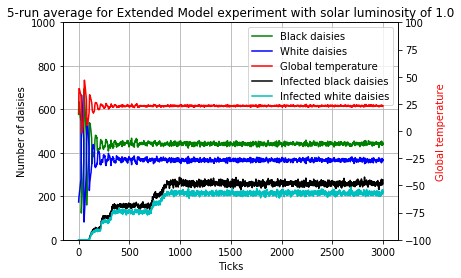

In [12]:
# Plot line graph

# NOTE: MODIFY PARAMS HERE TO PRODUCE AND SAVE THE REQUIRED GRAPHS
# EXP_NAME : NAME OF CURRENT EXPERIMENT
# MODE [0, NUM_MODES) : 0 MEANS RUN FOR LOW PARAM, 1 MEANS MEDIUM PARAM, ETC..
# VARIABLE : MORE DETAIL OF VARYING PARAM, FOR BETTER GRAPH TITLE.

EXP_NAME = "ext-1"
MODE = 2
VARIABLE = "solar luminosity of 1.0"


# create figure and axis objects with subplots()
fig,ax=plt.subplots()

l1 = ax.plot(ticks, black_meanvar[MODE][0], "-g", label="Black daisies")
l2 = ax.plot(ticks, white_meanvar[MODE][0], "-b", label="White daisies")

ax.set_xlabel("Ticks")
ax.set_ylabel("Number of daisies")
ax.set_ylim(0,1000)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3= ax2.plot(ticks, temp_meanvar[MODE][0], "-r", label="Global temperature")
ax2.set_ylabel("Global temperature",color="red")
ax2.set_ylim(-100,100)


# Extended model checkpoint
if USE_EXTENSION:
    plt_title = "5-run average for Extended Model experiment with " + VARIABLE
    
    l4 = ax.plot(ticks, infblack_meanvar[MODE][0], "-k", label="Infected black daisies")
    l5 = ax.plot(ticks, infwhite_meanvar[MODE][0], "-c", label="Infected white daisies")
    
    lines = l1 + l2 + l3 + l4 + l5
else:
    plt_title = "5-run average for Model experiment with " + VARIABLE
    
    lines = l1 + l2 + l3

    
# Set legends
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, loc=0)

# Config
ax.grid()
plt.title(plt_title)
plt.show()

# save the plot as a file
fig.savefig('model-'+EXP_NAME+'-mode-'+str(MODE)+'.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')